# Modeling

## Daily Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_d = pd.read_csv("DailyDataset.csv", index_col=0)
df_d = df_d.set_index('Date')
df_d = df_d.dropna()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Dummification

In [4]:
for column in ['Month', 'DayOfW']:
  dummies = pd.get_dummies(df_d[column], prefix=column)
  df_d[dummies.columns] = dummies

#### Splitting

In [5]:
data = df_d.drop(columns=['Return+1', 'target_bin', 'Month', 'DayOfW'])
X, y = data.drop(columns=['target_multi']), data['target_multi']
column_list = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Shape", X_train.shape, X_test.shape)

Shape (803, 40) (201, 40)


#### Scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

##### Interpretation Tools

In [7]:
def graph_prediction(y_true, y_predicted):
  
  print("Acurracy : ", accuracy_score(y_true, y_predicted))
  print("F1 Score : ", f1_score(y_true, y_predicted, average='macro'))
  print("Recall : ", recall_score(y_true, y_predicted, average='macro'))
  
  cf_matrix = confusion_matrix(y_true, y_predicted)
  fig = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
              fmt='.2%', cmap='Blues')
  fig.set_xlabel("Predicted", fontsize = 13)
  fig.set_ylabel("True", fontsize = 13)

In [8]:
def var_importance(model):
	importance = model.best_estimator_.feature_importances_#get importance
 
	plt.figure(figsize=(20, 4)) 
	plt.bar(column_list, importance) #plot feature importance
	plt.xticks(column_list, rotation=90)
	plt.show()

In [9]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)

#### RandomForestClassifier 

In [10]:
rfc =  RandomForestClassifier()

params_rf = { 
    'n_estimators': [100, 200, 500, 750],
    'max_depth' : [None, 20, 40, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
}

reg_random = RandomizedSearchCV(rfc, params_rf, n_jobs=-1, cv=rkf)
reg_random.fit(X_train, y_train)
y_pred = reg_random.predict(X_test)
print("Best Params : ", reg_random.best_params_)

Best Params :  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 40}


Acurracy :  0.36318407960199006
F1 Score :  0.3156735007394007
Recall :  0.3382096830372692


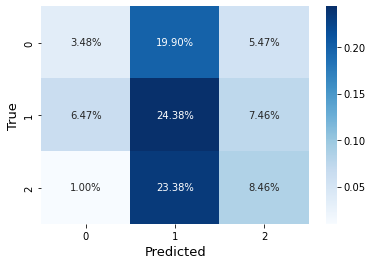

In [11]:
graph_prediction(y_test, y_pred)

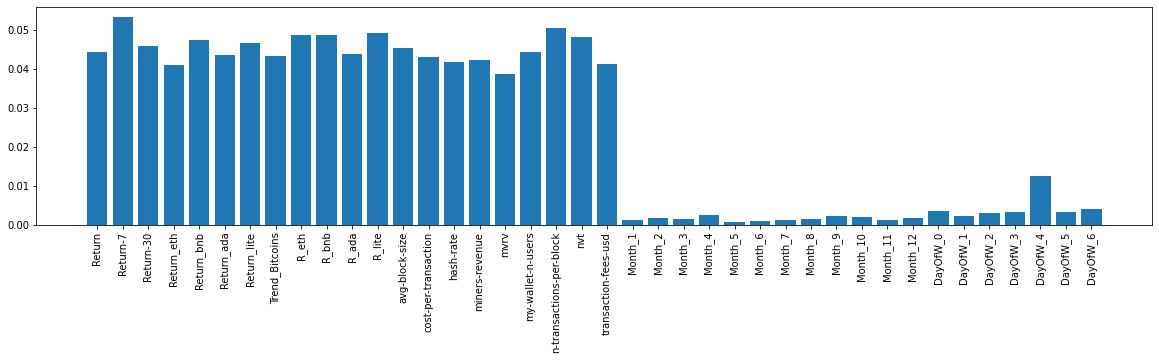

In [12]:
var_importance(reg_random)

#### XGBoost

In [13]:
xgb = XGBClassifier()

params_xgb = {
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, .05, .01], 
              'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3],
              'subsample': [0.6, 1]}

xgb_random = RandomizedSearchCV(xgb, params_xgb, n_jobs=-1, verbose=False, cv=rkf)
xgb_random.fit(X_train, y_train)
y_pred = xgb_random.predict(X_test)

c:\Users\mathy\Anaconda3\envs\NLP\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Acurracy :  0.31840796019900497
F1 Score :  0.31523084970436144
Recall :  0.31278300243817486


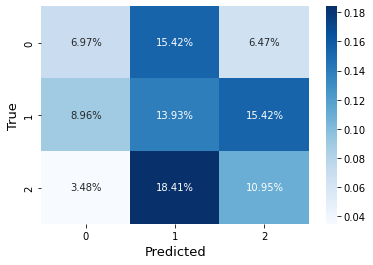

In [14]:
graph_prediction(y_test, y_pred)

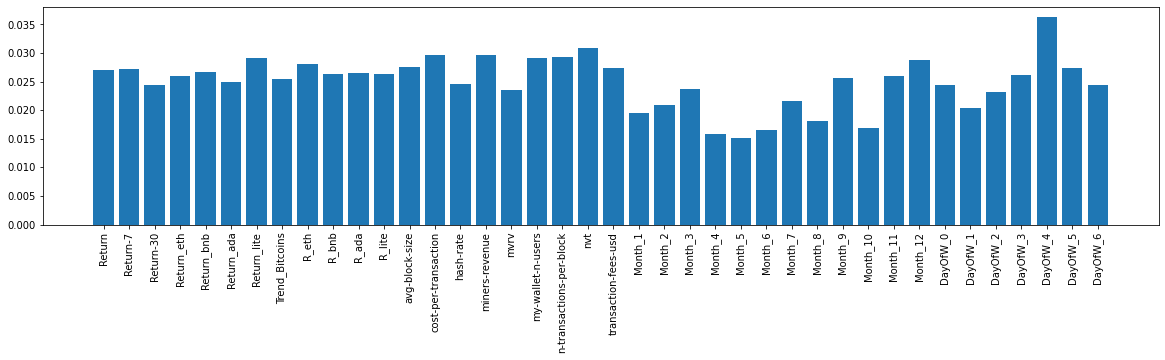

In [15]:
var_importance(xgb_random)

## Hourly Dataset

In [16]:
df_h = pd.read_csv("HourlyDataset.csv", index_col=0)
df_h = df_h.set_index('Date')
df_h = df_h.dropna()

### Data Preparation

#### Dummification

In [17]:
for column in ['Month', 'DayOfW']:
  dummies = pd.get_dummies(df_h[column], prefix=column)
  df_h[dummies.columns] = dummies

#### Splitting

In [18]:
data = df_h.drop(columns=['Return+1', 'target_bin', 'Month', 'DayOfW'])
X, y = data.drop(columns=['target_multi']), data['target_multi']
column_list = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Shape", X_train.shape, X_test.shape)

Shape (13404, 44) (3351, 44)


#### Scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Modelling

#### Random Forest

In [20]:
rfc =  RandomForestClassifier()

params_rf = { 
    'n_estimators': [100, 200, 500, 750],
    'max_depth' : [None, 20, 40, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
}

reg_random = RandomizedSearchCV(rfc, params_rf, n_jobs=-1, cv=rkf)
reg_random.fit(X_train, y_train)
y_pred = reg_random.predict(X_test)
print("Best Params : ", reg_random.best_params_)

Best Params :  {'n_estimators': 500, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 20}


Acurracy :  0.3303491495076097
F1 Score :  0.32744085459648486
Recall :  0.3338157691885904


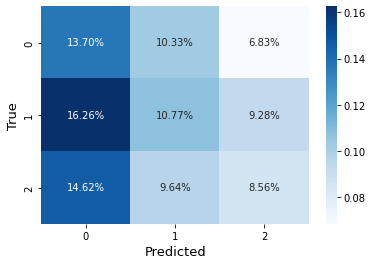

In [21]:
graph_prediction(y_test, y_pred)

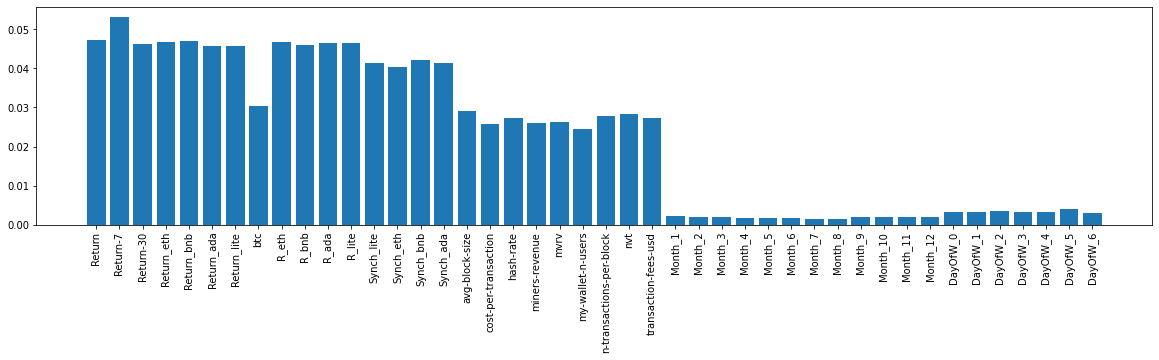

In [22]:
var_importance(reg_random)

#### XGBoost

In [23]:
xgb = XGBClassifier()

params_xgb = {
              'learning_rate': [.03, .05, .01], 
              'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3],
              'subsample': [0.6, 1]}

xgb_random = RandomizedSearchCV(xgb, params_xgb, n_jobs=-1, verbose=False, cv=rkf)
xgb_random.fit(X_train, y_train)
y_pred = xgb_random.predict(X_test)
print("Best Params : ", reg_random.best_params_)

c:\Users\mathy\Anaconda3\envs\NLP\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params :  {'n_estimators': 500, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 20}


Acurracy :  0.3378096090719188
F1 Score :  0.3238534182877577
Recall :  0.3448382812371693


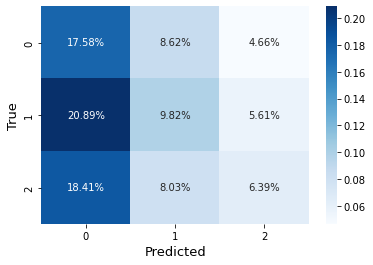

In [24]:
graph_prediction(y_test, y_pred)

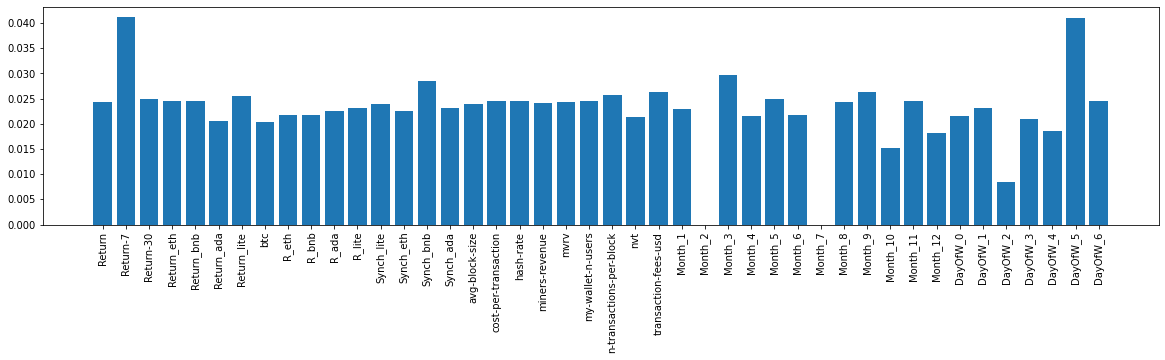

In [25]:
var_importance(xgb_random)